# Problem 1: Line plots

Target:

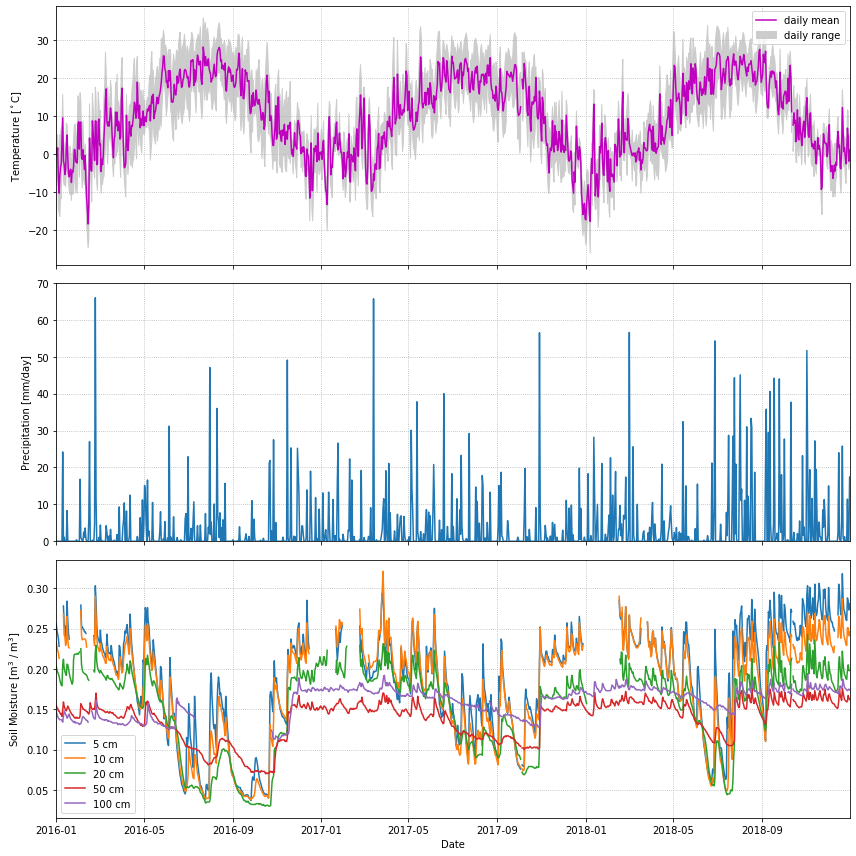


In [1]:
# pip install pooch 

In [2]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df


,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,64756,2.422,-73.74,41.79,3.4,-0.5,1.5,1.3,0.0,1.69,...,0.233,0.204,0.155,0.147,4.2,4.4,5.1,6.0,7.6,NaN
2016-01-02,64756,2.422,-73.74,41.79,2.9,-3.6,-0.4,-0.3,0.0,6.25,...,0.227,0.199,0.152,0.144,2.8,3.1,4.2,5.7,7.4,NaN
2016-01-03,64756,2.422,-73.74,41.79,5.1,-1.8,1.6,1.1,0.0,5.69,...,0.223,0.196,0.151,0.141,2.6,2.8,3.8,5.2,7.2,NaN
2016-01-04,64756,2.422,-73.74,41.79,0.5,-14.4,-6.9,-7.5,0.0,9.17,...,0.220,0.194,0.148,0.139,1.7,2.1,3.4,4.9,6.9,NaN
2016-01-05,64756,2.422,-73.74,41.79,-5.2,-15.5,-10.3,-11.7,0.0,9.34,...,0.213,0.191,0.148,0.138,0.4,0.9,2.4,4.3,6.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,64756,2.622,-73.74,41.79,2.5,-2.1,0.2,0.3,0.0,7.50,...,0.275,0.248,0.191,0.192,1.3,1.4,1.9,3.2,4.7,NaN
2018-12-28,64756,2.622,-73.74,41.79,11.6,1.9,6.8,7.6,11.5,0.45,...,0.295,0.261,0.193,0.191,2.9,2.7,2.5,3.1,4.5,NaN
2018-12-29,64756,2.622,-73.74,41.79,11.3,-2.1,4.6,6.3,0.0,4.89,...,0.295,0.270,0.208,0.191,4.5,4.4,4.0,3.8,4.5,NaN


In [3]:
#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [4]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


In [5]:
import matplotlib.pyplot as plt
import numpy as np

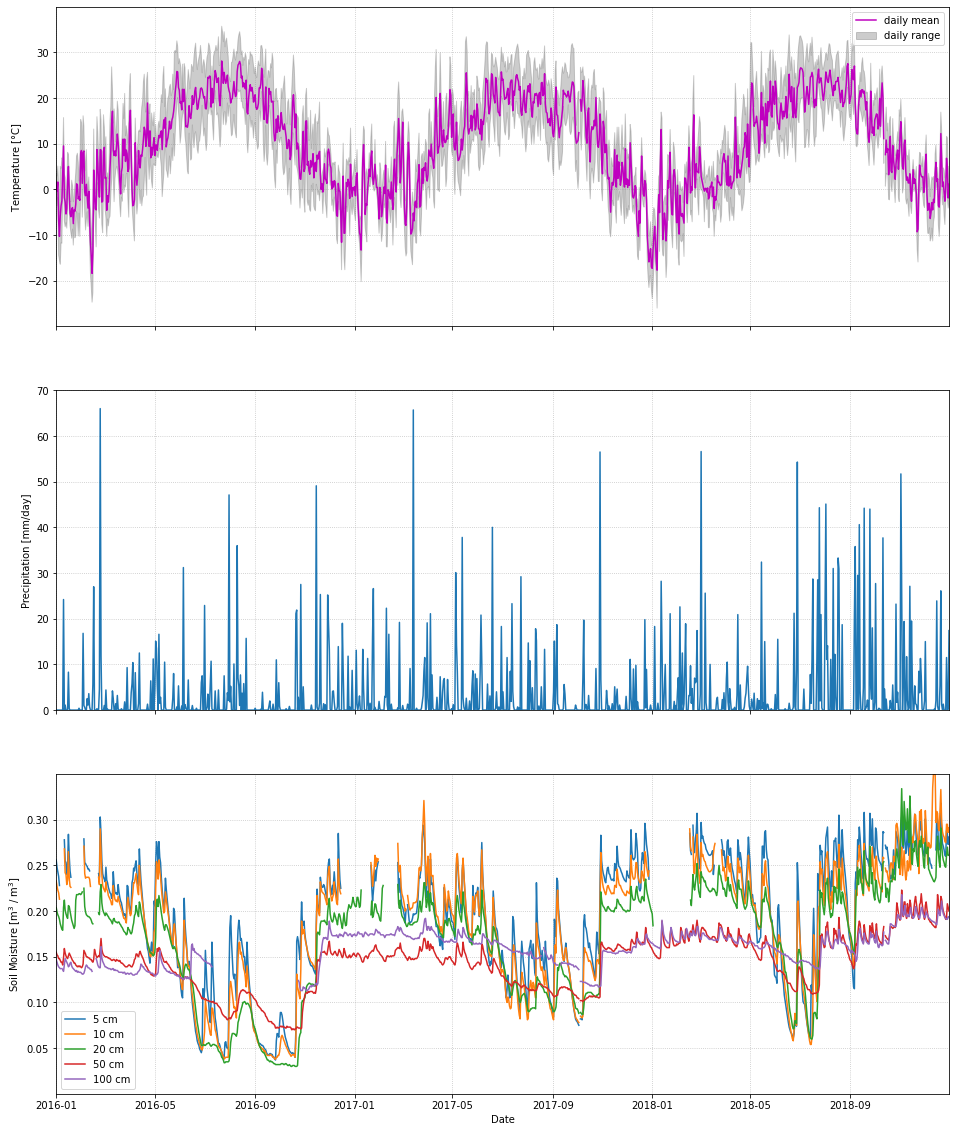

In [6]:
fig, ax = plt.subplots(figsize = (16, 20), nrows = 3)
fig.patch.set_facecolor('white')

temp_lims = [-30, 40]
temp_ticks = np.arange(-20, 40, 10)
precip_lims = [0, 70]
precip_ticks = np.arange(0, 80, 10)
soil_lims = [0, 0.35]
soil_ticks = np.arange(0.05, 0.35, 0.05)
date_lims = [min(date), max(date)]

line1 = ax[0].plot(date, t_daily_mean, color = 'm', label = 'daily mean')
ax[0].set_ylim(temp_lims)
ax[0].set_yticks(temp_ticks)
ax[0].set_xlim(date_lims)
ax[0].grid(which = 'major', linestyle = 'dotted', color = 'grey', alpha = 0.5)
ax[0].set_ylabel('Temperature [$\degree$C]')
ax[0].fill_between(date, t_daily_min, t_daily_max, color = 'grey', alpha = 0.4, label = 'daily range')
ax[0].legend(loc = 0)
ax[0].set_xticklabels([])


line2 = ax[1].plot(date, p_daily_calc, color = 'tab:blue')
ax[1].set_ylim(precip_lims)
ax[1].set_yticks(precip_ticks)
ax[1].set_xlim(date_lims)
ax[1].grid(which = 'major', linestyle = 'dotted', color = 'grey', alpha = 0.5)
ax[1].set_ylabel('Precipitation [mm/day]')
ax[1].set_xticklabels([])

line3 = ax[2].plot(date, soil_moisture_5, color = 'tab:blue', label = '5 cm')
line4 = ax[2].plot(date, soil_moisture_10, color = 'tab:orange', label = '10 cm')
line5 = ax[2].plot(date, soil_moisture_20, color = 'tab:green', label = '20 cm')
line6 = ax[2].plot(date, soil_moisture_50, color = 'tab:red', label = '50 cm')
line7 = ax[2].plot(date, soil_moisture_100, color = 'tab:purple', label = '100 cm')
ax[2].set_ylim(soil_lims)
ax[2].set_yticks(soil_ticks)
ax[2].set_xlim(date_lims)
ax[2].grid(which = 'major', linestyle = 'dotted', color = 'grey', alpha = 0.5)
ax[2].set_ylabel('Soil Moisture [m$^3$ / m$^3$]')
ax[2].legend(loc = 3)
ax[2].set_xlabel('Date')

plt.savefig('Line Plot Assignment.png', bbox_inches='tight', pad_inches=0.5)


# Problem 2: Contour Plots

Target: 


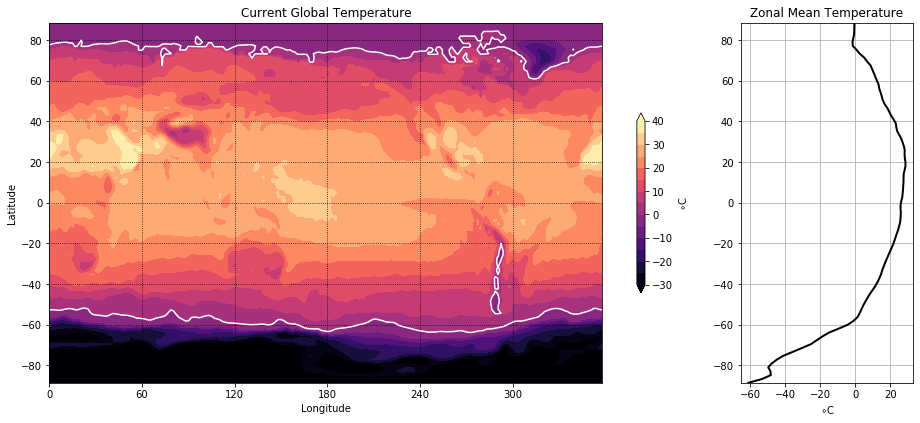

In [7]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

In [8]:
temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

import matplotlib.pyplot as plt
import numpy as np


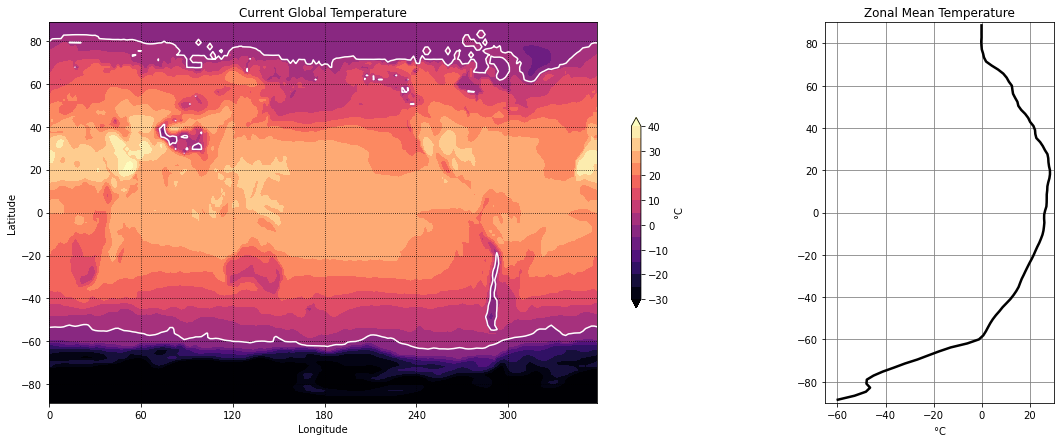

In [9]:
fig, ax = plt.subplots(figsize=(18, 7), ncols=2, gridspec_kw={'width_ratios': [3, 1]})
#fig.suptitle('My attempt to replicate the figure:', fontsize = 25)
fig.patch.set_facecolor('white')

clevels = np.arange(-30, 45, 5)
xticks_0 =  np.arange(0, 360, 60)
yticks_0 = np.arange(-80, 100, 20)

cf0 = ax[0].contourf(lon, lat, temp, clevels, cmap='magma', extend='both')
cf1 = ax[0].contour(lon, lat, temp, 0, colors = 'white', linewidths = 1.5)

ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Current Global Temperature')
ax[0].set_xticks(xticks_0)
ax[0].set_yticks(yticks_0)
ax[0].grid(which = 'major', linestyle = 'dotted', color = 'k')

cbar = plt.colorbar(cf0, ax = ax[0], shrink = 0.5)
cbar.set_label('$\degree$C')

xticks_1 =  np.arange(-60, 40, 20)
yticks_1 = np.arange(-80, 100, 20)


ax[1].plot(temp.mean(axis = 1), lat, color = 'k', linewidth = 2.5)

ax[1].set_xlim([-65,30])
ax[1].set_ylim([-90,90])
ax[1].set_xticks(xticks_1)
ax[1].set_yticks(yticks_1)
ax[1].grid(which = 'major', linestyle = '-', color = 'grey')
ax[1].set_title('Zonal Mean Temperature')
ax[1].set_xlabel('$\degree$C')

plt.savefig('Contour Assignment.png', bbox_inches='tight', pad_inches=0.5)



# Problem 3: Scatter plots

Target:
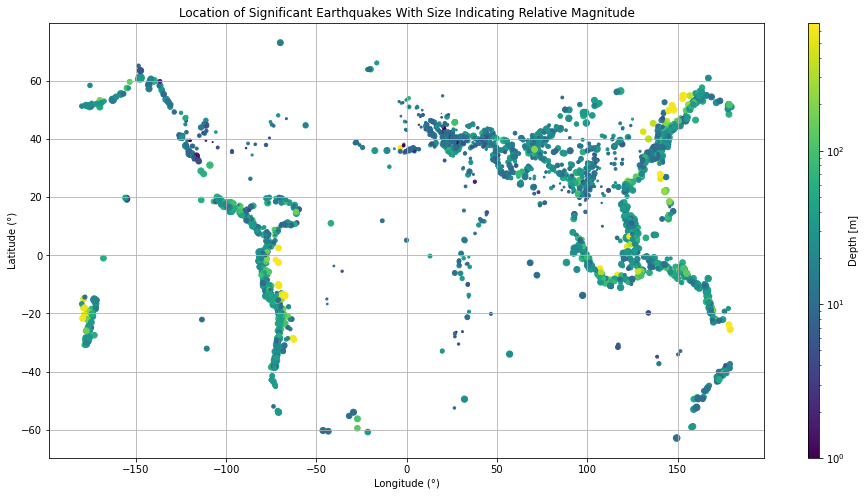

In [10]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Unzipping contents of 'C:\Users\danho\AppData\Local\pooch\pooch\Cache\031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip' to 'C:\Users\danho\AppData\Local\pooch\pooch\Cache\031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip.unzip'


C:\Users\danho\AppData\Local\Temp\ipykernel_14252\2940850287.py:4: RuntimeWarning: divide by zero encountered in log10
  sctr = ax.scatter(longitude, latitude, np.power(magnitude, 4)/100, np.log10(depth))


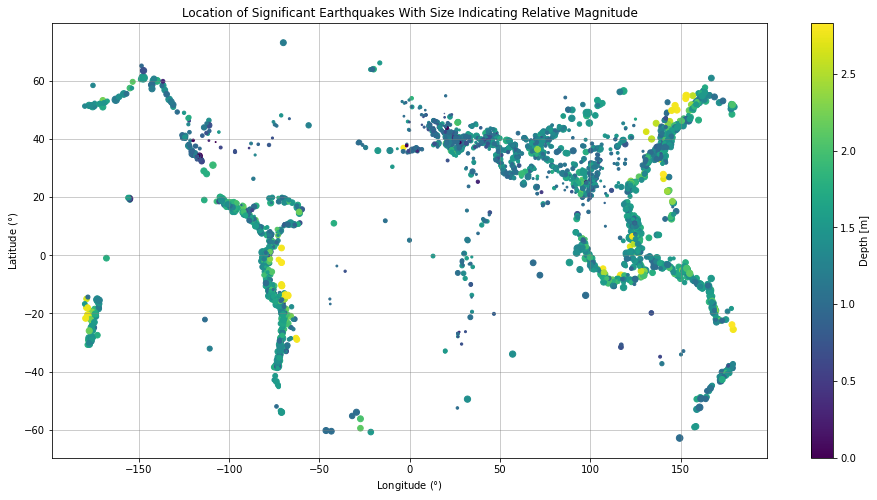

In [39]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

sctr = ax.scatter(longitude, latitude, np.power(magnitude, 4)/100, np.log10(depth))

ax.set_title('Location of Significant Earthquakes With Size Indicating Relative Magnitude')
ax.set_ylabel('Latitude ($\degree$)')
ax.set_xlabel('Longitude ($\degree$)')
ax.grid(which = 'major', linestyle = '-', color = 'grey', alpha = 0.5)

fig.colorbar(sctr, location = 'right', label = 'Depth [m]')

plt.savefig('Scatter Assignment.png', bbox_inches='tight', pad_inches=0.5)

#need to edit color bar labels
